PROJECT FEATURES

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import math

from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler, minmax_scale

# Exploratory Data Analysis

In [56]:
lagosrent = pd.read_csv('lagosrent.csv')
lagosrent.head()

,rent,location,bedroom,bathroom,toilet,parking
0,4500000,Conservation Road Lekki Lagos,4.0,4.0,5.0,3.0
1,5500000,Osapa London Osapa Lekki Lagos,4.0,4.0,5.0,3.0
2,5500000,Bogije Bogije Ibeju Lekki Lagos,3.0,3.0,4.0,NaN
3,5500000,Beechwood Estate Bogije Ibeju Lekki Lagos,4.0,4.0,5.0,NaN
4,5500000,Eleko Eleko Ibeju Lekki Lagos,4.0,4.0,5.0,NaN


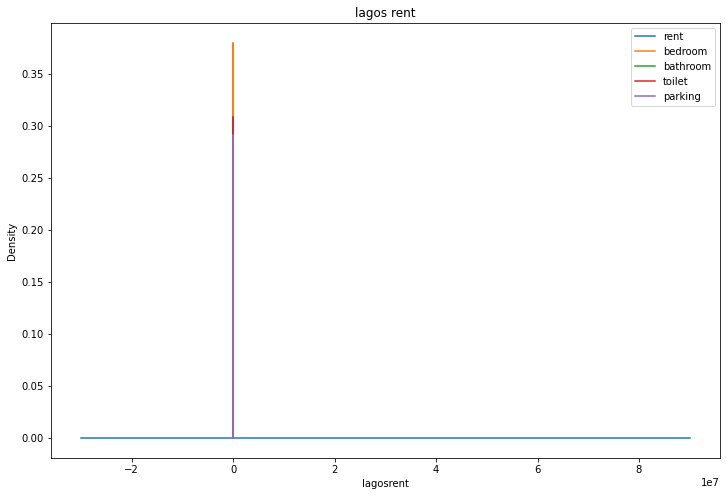

In [99]:
lagosrent.plot.kde(figsize = (12,8))
plt.title('lagos rent')
plt.xlabel("lagosrent")
plt.show()

In [59]:
lagosrent.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rent,16800.0,7.335518e+06,1.239409e+07,1200.0,1200000.0,5500000.0,5500000.0,60000000.0
bedroom,15111.0,3.707101e+00,2.899367e+00,1.0,2.0,4.0,4.0,15.0
bathroom,15111.0,4.639733e+00,9.858156e+00,1.0,2.0,4.0,4.0,120.0
toilet,15011.0,4.752848e+00,3.869861e+00,1.0,3.0,4.0,5.0,20.0
parking,8434.0,4.760849e+00,5.735366e+00,1.0,2.0,2.0,3.0,20.0


In [5]:
lagosrent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16800 entries, 0 to 16799
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rent      16800 non-null  int64  
 1   location  16800 non-null  object 
 2   bedroom   15111 non-null  float64
 3   bathroom  15111 non-null  float64
 4   toilet    15011 non-null  float64
 5   parking   8434 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 787.6+ KB


In [6]:
lagosrent.shape

(16800, 6)

In [7]:
lagosrent.location.unique()

array([' Conservation Road Lekki Lagos',
       ' Osapa London Osapa Lekki Lagos',
       ' Bogije Bogije Ibeju Lekki Lagos',
       ' Beechwood Estate Bogije Ibeju Lekki Lagos',
       ' Eleko Eleko Ibeju Lekki Lagos', ' Banana Island Ikoyi Lagos',
       ' Lekki Phase 1 Lekki Lagos', ' Agungi Lekki Lagos',
       ' Lekki Lagos Lekki Lagos',
       ' Alagomeji Yaba Lagos. Alagomeji Yaba Lagos',
       ' In A Well Secured Mini Court Ikoyi Lagos',
       ' Osapa London Lekki Lagos', ' Off Pedro Road Pedro Gbagada Lagos',
       ' Ikate Lekki Lagos', ' Kilo Surulere Lagos',
       ' Iran-la Through Alasia Opposite Lbs Alasia Ajah Lagos',
       ' Near Airportajao Estate Isolo Lagos',
       ' Opp Harmony Estate Ado Ajah Lagos',
       ' Banana Island Ikoyi Lagos Ikoyi Lagos', ' Mende Maryland Lagos',
       ' Off Bishop Oluwole Victoria Island (VI) Lagos',
       ' Bakare Estate Agungi Lekki Lagos', ' Victoria Island (VI) Lagos',
       ' Off Bourdillon Road Old Ikoyi Ikoyi Lagos', ' Iko

In [8]:
lagosrent.isnull().sum()

rent           0
location       0
bedroom     1689
bathroom    1689
toilet      1789
parking     8366
dtype: int64

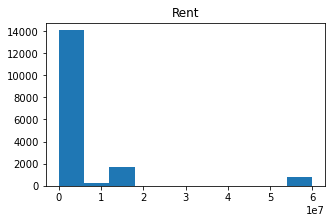

In [100]:
plt.figure(figsize=(5,3))
plt.hist(lagosrent["rent"])
plt.title("Rent")
plt.show()

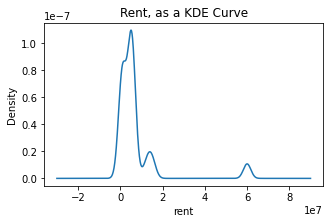

In [85]:
lagosrent["rent"].plot.kde(figsize = (5,3))

plt.title("Rent, as a KDE Curve")
plt.xlabel("rent")

plt.show()

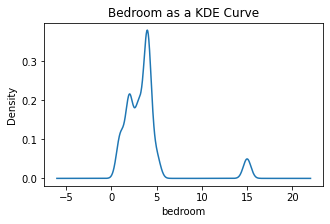

In [82]:
lagosrent["bedroom"].plot.kde(figsize = (5,3))

plt.title("Bedroom as a KDE Curve")
plt.xlabel("bedroom")

plt.show()

# DATA CLEANING

In [10]:
lagosrent_clean = lagosrent.dropna(thresh=3)
lagosrent_clean.head()

,rent,location,bedroom,bathroom,toilet,parking
0,4500000,Conservation Road Lekki Lagos,4.0,4.0,5.0,3.0
1,5500000,Osapa London Osapa Lekki Lagos,4.0,4.0,5.0,3.0
2,5500000,Bogije Bogije Ibeju Lekki Lagos,3.0,3.0,4.0,NaN
3,5500000,Beechwood Estate Bogije Ibeju Lekki Lagos,4.0,4.0,5.0,NaN
4,5500000,Eleko Eleko Ibeju Lekki Lagos,4.0,4.0,5.0,NaN


In [14]:
lagosrent_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rent,15111.0,7.573066e+06,1.304049e+07,50000.0,1200000.0,4500000.0,5500000.0,60000000.0
bedroom,15111.0,3.707101e+00,2.899367e+00,1.0,2.0,4.0,4.0,15.0
bathroom,15111.0,4.639733e+00,9.858156e+00,1.0,2.0,4.0,4.0,120.0
toilet,15011.0,4.752848e+00,3.869861e+00,1.0,3.0,4.0,5.0,20.0
parking,8434.0,4.760849e+00,5.735366e+00,1.0,2.0,2.0,3.0,20.0


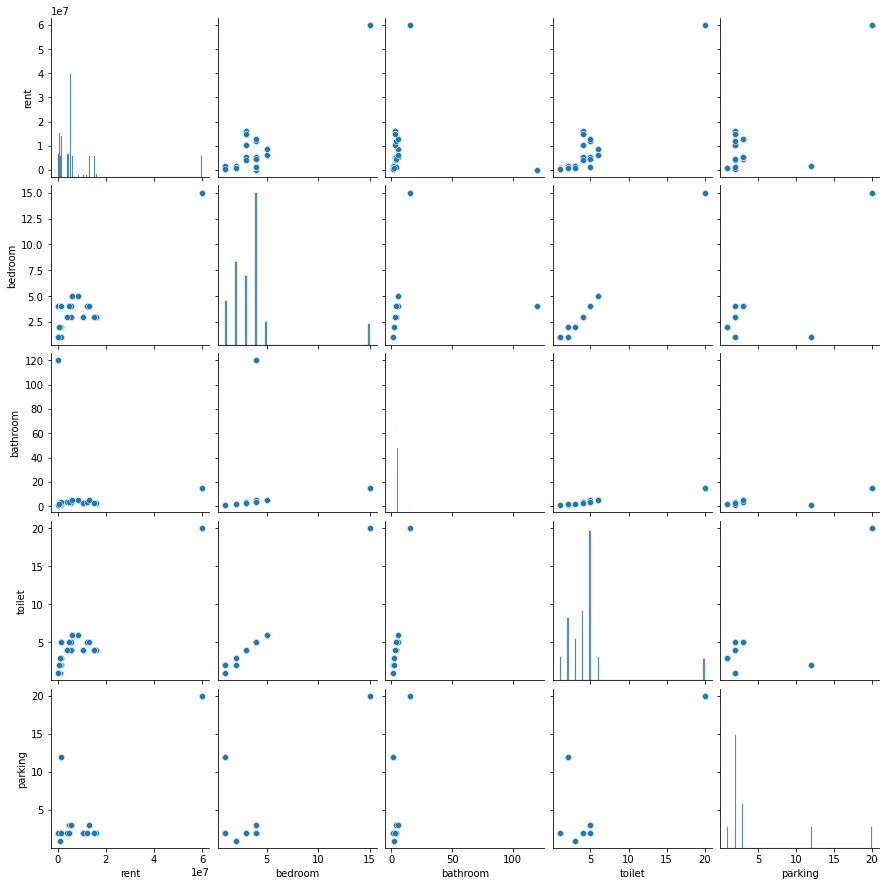

In [17]:
sns.pairplot(lagosrent_clean)

In [18]:
lagosrent_clean.bathroom.unique()

array([  4.,   3.,   5.,   1.,  15.,   2., 120.])

In [19]:
pd.value_counts(lagosrent_clean['bathroom'])

4.0      5060
2.0      3200
5.0      2493
3.0      1774
1.0      1684
15.0      800
120.0     100
Name: bathroom, dtype: int64

In [16]:
#Cleaning my data

In [20]:
#Turning all the 120 bathroom to 4 in the data since the rows follows same pattern
lagosrent_clean['bathroom'].replace(120,4, inplace= True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [21]:
pd.value_counts(lagosrent_clean['bathroom'])

4.0     5160
2.0     3200
5.0     2493
3.0     1774
1.0     1684
15.0     800
Name: bathroom, dtype: int64

In [22]:
lagosrent_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rent,15111.0,7.573066e+06,1.304049e+07,50000.0,1200000.0,4500000.0,5500000.0,60000000.0
bedroom,15111.0,3.707101e+00,2.899367e+00,1.0,2.0,4.0,4.0,15.0
bathroom,15111.0,3.872080e+00,2.919341e+00,1.0,2.0,4.0,4.0,15.0
toilet,15011.0,4.752848e+00,3.869861e+00,1.0,3.0,4.0,5.0,20.0
parking,8434.0,4.760849e+00,5.735366e+00,1.0,2.0,2.0,3.0,20.0


In [23]:
#cheking the number of null in my toilet feature
pd.value_counts(lagosrent_clean['toilet'].isnull())

False    15011
True       100
Name: toilet, dtype: int64

In [24]:
#filling the NaN values in the toilet features
lagosrent_clean['toilet'].fillna(5, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [25]:
pd.value_counts(lagosrent_clean['toilet'].isnull())

False    15111
Name: toilet, dtype: int64

In [26]:
row_min1=lagosrent_clean.min(axis=1)
row_min=row_min1-1
row_min

0        2.0
1        2.0
2        2.0
3        3.0
4        3.0
        ... 
16795    0.0
16796    1.0
16797    1.0
16798    1.0
16799    4.0
Length: 15111, dtype: float64

In [27]:
lagosrent_clean['rowmin']=row_min

<ipython-input-27-f04079d75d2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lagosrent_clean['rowmin']=row_min


In [28]:
lagosrent_clean.head()

,rent,location,bedroom,bathroom,toilet,parking,rowmin
0,4500000,Conservation Road Lekki Lagos,4.0,4.0,5.0,3.0,2.0
1,5500000,Osapa London Osapa Lekki Lagos,4.0,4.0,5.0,3.0,2.0
2,5500000,Bogije Bogije Ibeju Lekki Lagos,3.0,3.0,4.0,NaN,2.0
3,5500000,Beechwood Estate Bogije Ibeju Lekki Lagos,4.0,4.0,5.0,NaN,3.0
4,5500000,Eleko Eleko Ibeju Lekki Lagos,4.0,4.0,5.0,NaN,3.0


In [30]:
lag_clean=lagosrent_clean.fillna(method='bfill',axis=1,)
lag_clean.head()

,rent,location,bedroom,bathroom,toilet,parking,rowmin
0,4500000,Conservation Road Lekki Lagos,4.0,4.0,5.0,3.0,2.0
1,5500000,Osapa London Osapa Lekki Lagos,4.0,4.0,5.0,3.0,2.0
2,5500000,Bogije Bogije Ibeju Lekki Lagos,3.0,3.0,4.0,2.0,2.0
3,5500000,Beechwood Estate Bogije Ibeju Lekki Lagos,4.0,4.0,5.0,3.0,3.0
4,5500000,Eleko Eleko Ibeju Lekki Lagos,4.0,4.0,5.0,3.0,3.0


In [31]:
lagos_clean=lag_clean.drop(['rowmin'], axis='columns')
lagos_clean.head()

,rent,location,bedroom,bathroom,toilet,parking
0,4500000,Conservation Road Lekki Lagos,4.0,4.0,5.0,3.0
1,5500000,Osapa London Osapa Lekki Lagos,4.0,4.0,5.0,3.0
2,5500000,Bogije Bogije Ibeju Lekki Lagos,3.0,3.0,4.0,2.0
3,5500000,Beechwood Estate Bogije Ibeju Lekki Lagos,4.0,4.0,5.0,3.0
4,5500000,Eleko Eleko Ibeju Lekki Lagos,4.0,4.0,5.0,3.0


In [32]:
lagos_clean.isnull().sum()

rent        0
location    0
bedroom     0
bathroom    0
toilet      0
parking     0
dtype: int64

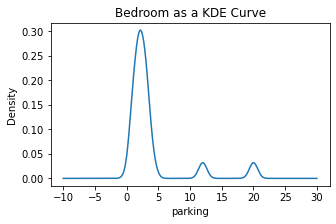

In [87]:
lagos_clean["parking"].plot.kde(figsize = (5,3))

plt.title("Bedroom as a KDE Curve")
plt.xlabel("parking")

plt.show()

In [97]:
lagos_clean.to_csv('clean_lagosrent.csv')

# Feature Selection and Engineering

In [33]:
#Using One Hot Encoding for my 'location' column
lag_clean=pd.get_dummies(lagos_clean['location'], drop_first=True)
lag_clean.head()

,Agungi Lekki Lagos,Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,Bakare Estate Agungi Lekki Lagos,Banana Island Ikoyi Lagos Ikoyi Lagos,Beechwood Estate Bogije Ibeju Lekki Lagos,Bogije Bogije Ibeju Lekki Lagos,Conservation Road Lekki Lagos,Eleko Eleko Ibeju Lekki Lagos,Ikate Lekki Lagos,In A Well Secured Mini Court Ikoyi Lagos,...,Lekki Phase 1 Lekki Lagos,Mende Maryland Lagos,Near Airportajao Estate Isolo Lagos,Off Bishop Oluwole Victoria Island (VI) Lagos,Off Bourdillon Road Old Ikoyi Ikoyi Lagos,Off Pedro Road Pedro Gbagada Lagos,Opp Harmony Estate Ado Ajah Lagos,Osapa London Lekki Lagos,Osapa London Osapa Lekki Lagos,Victoria Island (VI) Lagos
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#Merging the encoded features with my original dataframe
finallagos_clean=pd.concat([lag_clean,lagos_clean], axis=1)
finallagos_clean.head()

,Agungi Lekki Lagos,Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,Bakare Estate Agungi Lekki Lagos,Banana Island Ikoyi Lagos Ikoyi Lagos,Beechwood Estate Bogije Ibeju Lekki Lagos,Bogije Bogije Ibeju Lekki Lagos,Conservation Road Lekki Lagos,Eleko Eleko Ibeju Lekki Lagos,Ikate Lekki Lagos,In A Well Secured Mini Court Ikoyi Lagos,...,Opp Harmony Estate Ado Ajah Lagos,Osapa London Lekki Lagos,Osapa London Osapa Lekki Lagos,Victoria Island (VI) Lagos,rent,location,bedroom,bathroom,toilet,parking
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,4500000,Conservation Road Lekki Lagos,4.0,4.0,5.0,3.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,5500000,Osapa London Osapa Lekki Lagos,4.0,4.0,5.0,3.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,5500000,Bogije Bogije Ibeju Lekki Lagos,3.0,3.0,4.0,2.0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,5500000,Beechwood Estate Bogije Ibeju Lekki Lagos,4.0,4.0,5.0,3.0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,5500000,Eleko Eleko Ibeju Lekki Lagos,4.0,4.0,5.0,3.0


In [35]:
#Dropping the original 'location' column since it is already encoded
finallagos_clean.drop('location',axis=1, inplace=True)

In [36]:
finallagos_clean.head()

,Agungi Lekki Lagos,Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,Bakare Estate Agungi Lekki Lagos,Banana Island Ikoyi Lagos Ikoyi Lagos,Beechwood Estate Bogije Ibeju Lekki Lagos,Bogije Bogije Ibeju Lekki Lagos,Conservation Road Lekki Lagos,Eleko Eleko Ibeju Lekki Lagos,Ikate Lekki Lagos,In A Well Secured Mini Court Ikoyi Lagos,...,Off Pedro Road Pedro Gbagada Lagos,Opp Harmony Estate Ado Ajah Lagos,Osapa London Lekki Lagos,Osapa London Osapa Lekki Lagos,Victoria Island (VI) Lagos,rent,bedroom,bathroom,toilet,parking
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,4500000,4.0,4.0,5.0,3.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,5500000,4.0,4.0,5.0,3.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,5500000,3.0,3.0,4.0,2.0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,5500000,4.0,4.0,5.0,3.0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,5500000,4.0,4.0,5.0,3.0


In [37]:
#Checking the correlation of my features
finallagos_clean.corr()

,Agungi Lekki Lagos,Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,Bakare Estate Agungi Lekki Lagos,Banana Island Ikoyi Lagos Ikoyi Lagos,Beechwood Estate Bogije Ibeju Lekki Lagos,Bogije Bogije Ibeju Lekki Lagos,Conservation Road Lekki Lagos,Eleko Eleko Ibeju Lekki Lagos,Ikate Lekki Lagos,In A Well Secured Mini Court Ikoyi Lagos,...,Lekki Phase 1 Lekki Lagos,Mende Maryland Lagos,Near Airportajao Estate Isolo Lagos,Off Bishop Oluwole Victoria Island (VI) Lagos,Off Bourdillon Road Old Ikoyi Ikoyi Lagos,Off Pedro Road Pedro Gbagada Lagos,Opp Harmony Estate Ado Ajah Lagos,Osapa London Lekki Lagos,Osapa London Osapa Lekki Lagos,Victoria Island (VI) Lagos
Agungi Lekki Lagos,1.000000,-0.055901,-0.017677,-0.055901,-0.055901,-0.055901,-0.017783,-0.055901,-0.055901,-0.055901,...,-0.055901,-0.055901,-0.055901,-0.016586,-0.017464,-0.055901,-0.055901,-0.059254,-0.055901,-0.019298
Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,-0.055901,1.000000,-0.017677,-0.055901,-0.055901,-0.055901,-0.017783,-0.055901,-0.055901,-0.055901,...,-0.055901,-0.055901,-0.055901,-0.016586,-0.017464,-0.055901,-0.055901,-0.059254,-0.055901,-0.019298
Bakare Estate Agungi Lekki Lagos,-0.017677,-0.017677,1.000000,-0.017677,-0.017677,-0.017677,-0.005623,-0.017677,-0.017677,-0.017677,...,-0.017677,-0.017677,-0.017677,-0.005245,-0.005523,-0.017677,-0.017677,-0.018737,-0.017677,-0.006102
Banana Island Ikoyi Lagos Ikoyi Lagos,-0.055901,-0.055901,-0.017677,1.000000,-0.055901,-0.055901,-0.017783,-0.055901,-0.055901,-0.055901,...,-0.055901,-0.055901,-0.055901,-0.016586,-0.017464,-0.055901,-0.055901,-0.059254,-0.055901,-0.019298
Beechwood Estate Bogije Ibeju Lekki Lagos,-0.055901,-0.055901,-0.017677,-0.055901,1.000000,-0.055901,-0.017783,-0.055901,-0.055901,-0.055901,...,-0.055901,-0.055901,-0.055901,-0.016586,-0.017464,-0.055901,-0.055901,-0.059254,-0.055901,-0.019298
Bogije Bogije Ibeju Lekki Lagos,-0.055901,-0.055901,-0.017677,-0.055901,-0.055901,1.000000,-0.017783,-0.055901,-0.055901,-0.055901,...,-0.055901,-0.055901,-0.055901,-0.016586,-0.017464,-0.055901,-0.055901,-0.059254,-0.055901,-0.019298
Conservation Road Lekki Lagos,-0.017783,-0.017783,-0.005623,-0.017783,-0.017783,-0.017783,1.000000,-0.017783,-0.017783,-0.017783,...,-0.017783,-0.017783,-0.017783,-0.005276,-0.005556,-0.017783,-0.017783,-0.018849,-0.017783,-0.006139
Eleko Eleko Ibeju Lekki Lagos,-0.055901,-0.055901,-0.017677,-0.055901,-0.055901,-0.055901,-0.017783,1.000000,-0.055901,-0.055901,...,-0.055901,-0.055901,-0.055901,-0.016586,-0.017464,-0.055901,-0.055901,-0.059254,-0.055901,-0.019298
Ikate Lekki Lagos,-0.055901,-0.055901,-0.017677,-0.055901,-0.055901,-0.055901,-0.017783,-0.055901,1.000000,-0.055901,...,-0.055901,-0.055901,-0.055901,-0.016586,-0.017464,-0.055901,-0.055901,-0.059254,-0.055901,-0.019298
In A Well Secured Mini Court Ikoyi Lagos,-0.055901,-0.055901,-0.017677,-0.055901,-0.055901,-0.055901,-0.017783,-0.055901,-0.055901,1.000000,...,-0.055901,-0.055901,-0.055901,-0.016586,-0.017464,-0.055901,-0.055901,-0.059254,-0.055901,-0.019298


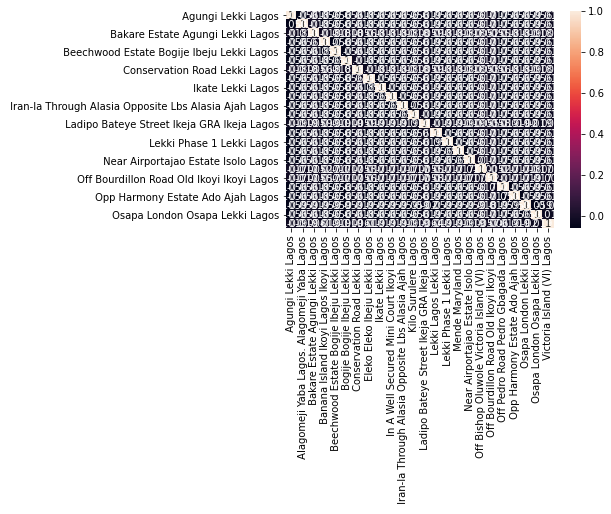

In [38]:
sns.heatmap(finallagos_clean.corr(), annot=True)
plt.show()

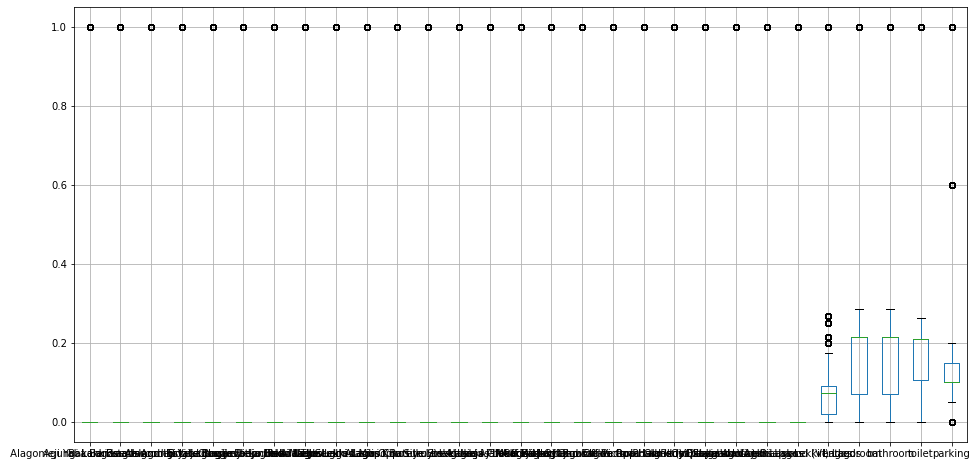

In [62]:
#Using min-max scaler to standardize my data inorder to be trainable
finlagos_clean = pd.DataFrame(minmax_scale(finallagos_clean), 
                         columns = finallagos_clean.columns)
finlagos_clean.boxplot(figsize = (16, 8))

plt.show()

In [90]:
finlagos_clean.head()

,Agungi Lekki Lagos,Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,Bakare Estate Agungi Lekki Lagos,Banana Island Ikoyi Lagos Ikoyi Lagos,Beechwood Estate Bogije Ibeju Lekki Lagos,Bogije Bogije Ibeju Lekki Lagos,Conservation Road Lekki Lagos,Eleko Eleko Ibeju Lekki Lagos,Ikate Lekki Lagos,In A Well Secured Mini Court Ikoyi Lagos,...,Off Pedro Road Pedro Gbagada Lagos,Opp Harmony Estate Ado Ajah Lagos,Osapa London Lekki Lagos,Osapa London Osapa Lekki Lagos,Victoria Island (VI) Lagos,rent,bedroom,bathroom,toilet,parking
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.074229,0.214286,0.214286,0.210526,0.15
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.090909,0.214286,0.214286,0.210526,0.15
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.090909,0.142857,0.142857,0.157895,0.10
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.090909,0.214286,0.214286,0.210526,0.15
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.090909,0.214286,0.214286,0.210526,0.15


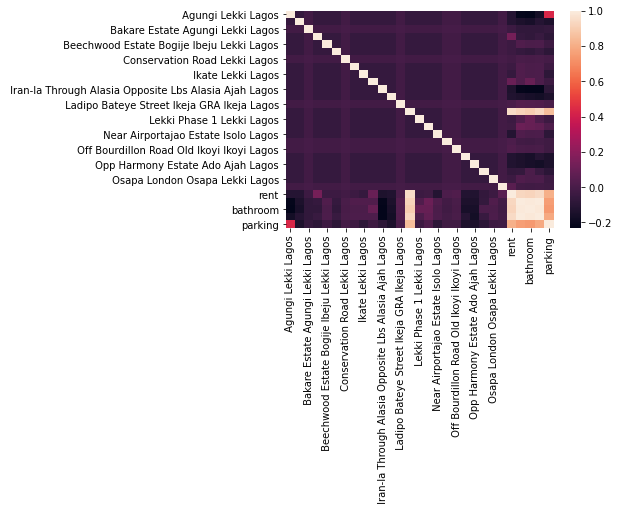

In [92]:
#Testing correlation of my model after standardization with min-max scaler
sns.heatmap(finlagos_clean.corr())
plt.show()

In [ ]:
finlagos_clean.iplot(kind='box', xTitle='Countries',
                    yTitle='Population')

In [101]:
finlagos_clean.iplot(kind='scatter', mode='markers')

AttributeError: 'DataFrame' object has no attribute 'iplot'

# TRAINING MY DATA

In [44]:
y = finlagos_clean["rent"]
x = finlagos_clean.drop("rent", axis = 1)

In [45]:
y

0        0.074229
1        0.090909
2        0.090909
3        0.090909
4        0.090909
           ...   
15106    0.004170
15107    0.019183
15108    0.009174
15109    0.249374
15110    0.099249
Name: rent, Length: 15111, dtype: float64

In [46]:
x

,Agungi Lekki Lagos,Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,Bakare Estate Agungi Lekki Lagos,Banana Island Ikoyi Lagos Ikoyi Lagos,Beechwood Estate Bogije Ibeju Lekki Lagos,Bogije Bogije Ibeju Lekki Lagos,Conservation Road Lekki Lagos,Eleko Eleko Ibeju Lekki Lagos,Ikate Lekki Lagos,In A Well Secured Mini Court Ikoyi Lagos,...,Off Bourdillon Road Old Ikoyi Ikoyi Lagos,Off Pedro Road Pedro Gbagada Lagos,Opp Harmony Estate Ado Ajah Lagos,Osapa London Lekki Lagos,Osapa London Osapa Lekki Lagos,Victoria Island (VI) Lagos,bedroom,bathroom,toilet,parking
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.214286,0.210526,0.15
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.214286,0.214286,0.210526,0.15
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.142857,0.157895,0.10
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.214286,0.210526,0.15
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.214286,0.210526,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.10
15107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.214286,0.210526,0.10
15108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.071429,0.071429,0.052632,0.05
15109,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.142857,0.157895,0.10


In [47]:
from sklearn.model_selection import train_test_split
#Splitting my data to train and test features. Using 75% of my data for training and the remaining 25% for testing
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 27)

In [48]:
x_train

,Agungi Lekki Lagos,Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,Bakare Estate Agungi Lekki Lagos,Banana Island Ikoyi Lagos Ikoyi Lagos,Beechwood Estate Bogije Ibeju Lekki Lagos,Bogije Bogije Ibeju Lekki Lagos,Conservation Road Lekki Lagos,Eleko Eleko Ibeju Lekki Lagos,Ikate Lekki Lagos,In A Well Secured Mini Court Ikoyi Lagos,...,Off Bourdillon Road Old Ikoyi Ikoyi Lagos,Off Pedro Road Pedro Gbagada Lagos,Opp Harmony Estate Ado Ajah Lagos,Osapa London Lekki Lagos,Osapa London Osapa Lekki Lagos,Victoria Island (VI) Lagos,bedroom,bathroom,toilet,parking
724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.285714,0.210526,0.15
7852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.10
3586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.071429,0.071429,0.052632,0.05
7430,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.071429,0.105263,0.05
3730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.285714,0.210526,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.071429,0.071429,0.052632,0.05
14879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.071429,0.071429,0.052632,0.05
3912,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.142857,0.157895,0.10
3768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.285714,0.210526,0.15


In [49]:
y_train

724      0.090909
7852     0.004170
3586     0.009174
7430     0.024187
3730     0.216013
           ...   
4848     0.009174
14879    0.012510
3912     0.090909
3768     0.216013
5139     0.090909
Name: rent, Length: 11333, dtype: float64

In [50]:
x_test

,Agungi Lekki Lagos,Alagomeji Yaba Lagos. Alagomeji Yaba Lagos,Bakare Estate Agungi Lekki Lagos,Banana Island Ikoyi Lagos Ikoyi Lagos,Beechwood Estate Bogije Ibeju Lekki Lagos,Bogije Bogije Ibeju Lekki Lagos,Conservation Road Lekki Lagos,Eleko Eleko Ibeju Lekki Lagos,Ikate Lekki Lagos,In A Well Secured Mini Court Ikoyi Lagos,...,Off Bourdillon Road Old Ikoyi Ikoyi Lagos,Off Pedro Road Pedro Gbagada Lagos,Opp Harmony Estate Ado Ajah Lagos,Osapa London Lekki Lagos,Osapa London Osapa Lekki Lagos,Victoria Island (VI) Lagos,bedroom,bathroom,toilet,parking
9615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.071429,0.071429,0.052632,0.05
8547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.285714,0.210526,0.15
3978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.071429,0.071429,0.105263,0.05
6873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.285714,0.263158,0.20
15027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.071429,0.071429,0.105263,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.142857,0.157895,0.10
11161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.10
3485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.285714,0.210526,0.15
7728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.214286,0.214286,0.210526,0.15


In [51]:
y_test

9615     0.009174
8547     0.216013
3978     0.014178
6873     0.099249
15027    0.014178
           ...   
9222     0.090909
11161    0.004170
3485     0.216013
7728     0.090909
6452     0.019183
Name: rent, Length: 3778, dtype: float64

In [63]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [64]:
#Using Linear regression to fit my train set features in x and y
lm.fit(x_train, y_train)

LinearRegression()

In [67]:
y_pred = lm.predict(x_test)

In [68]:
pd.crosstab(y_pred, y_test)

rent,0.000000,0.004170,0.009174,0.012510,0.014178,0.019183,0.024187,0.065888,0.074229,0.090909,0.099249,0.140951,0.174312,0.199333,0.216013,0.249374,0.267723,1.000000
row_0,,,,,,,,,,,,,,,,,,
7.216450e-16,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4.170142e-03,0,203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9.174312e-03,0,0,195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.251043e-02,0,0,0,196,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.417848e-02,0,0,0,0,210,0,0,0,0,0,0,0,0,0,0,0,0,0
1.417848e-02,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0
1.918265e-02,0,0,0,0,0,192,0,0,0,0,0,0,0,0,0,0,0,0
2.418682e-02,0,0,0,0,0,0,226,0,0,0,0,0,0,0,0,0,0,0
2.418682e-02,0,0,0,0,0,0,190,0,0,0,0,0,0,0,0,0,0,0


In [71]:
#Viewing the coefficient of my model
print(lm.coef_)

[-8.44283832e-02 -1.92274362e-01 -2.45698692e-01  1.41143887e-01
  9.09090909e-02 -1.73215011e-02  7.42285238e-02  9.09090909e-02
  5.62221429e-02  2.44184474e-01 -2.19694270e-01 -1.39136157e-01
  2.49181384e-01  2.03931639e+00  1.19080220e-01  2.07479966e-01
  1.17627134e-03  6.60813346e-02  1.81326396e-01 -2.02282702e-01
 -1.42472270e-01 -1.41712222e-02  9.09090909e-02  1.59492511e-01
 -1.77614757e+00 -3.94395814e-01  1.23147744e+00 -3.60127617e-01]


In [73]:
#Using linear regression to predict my test features
y_pred=lm.predict(x_test)
print(y_pred)

[0.00917431 0.21601334 0.01417848 ... 0.21601334 0.09090909 0.01918265]


In [74]:
print(y_test)

9615     0.009174
8547     0.216013
3978     0.014178
6873     0.099249
15027    0.014178
           ...   
9222     0.090909
11161    0.004170
3485     0.216013
7728     0.090909
6452     0.019183
Name: rent, Length: 3778, dtype: float64


# TESTING MY MODEL PERFORMANCE

In [89]:
#Using mean squared error to verify my model
print(np.mean((y_pred-y_test)**2))

1.3858195967707107e-30


In [76]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

1.3858195967707107e-30
